In [3]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift
from __future__ import division
from deModel import DeFixedInt
from deModel import arrayFixedInt
import matplotlib.pyplot as plt

def quant(Nq,Mq,sig):
    sig_fx = arrayFixedInt(Nq,Mq, sig)
    sig_fxv = np.zeros(len(sig))
    for i in range(len(sig_fx)):
        sig_fxv[i] = (sig_fx[i].value / (2.0 ** sig_fx[i].fractWidth))
    return sig_fxv

scipy.signal.remez(numtaps, bands, desired, weight=None, Hz=None, type='bandpass', maxiter=25, grid_density=16, fs=None)

Calculate the minimax optimal filter using the Remez exchange algorithm.

Calculate the filter-coefficients for the finite impulse response (FIR) filter whose transfer function minimizes the maximum error between the desired gain and the realized gain in the specified frequency bands using the Remez exchange algorithm.

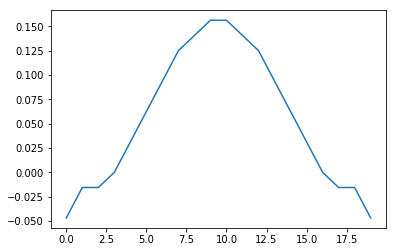

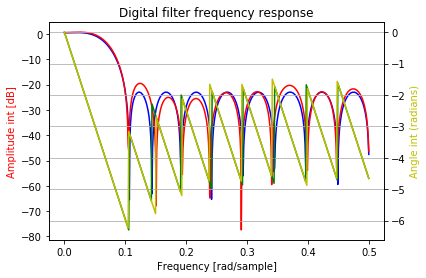

In [7]:
b = sig.remez(20, [0, 0.05, 0.10, 0.5], [1, 0],maxiter=100)
c = quant(2,6,b)
#ones = np.ones(1)
#zeros = np.zeros(20)
#dirac = np.concatenate((zeros,ones,zeros), axis=0)
#for i in range(len(dirac)):
#    b[i] = dirac[i] - b[i]
#b[20]=b[20]-1
plt.plot (c)
w, h = sig.freqz(b)
w, hq = sig.freqz(c)
w = w/(2*np.pi)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.plot(w, 20 * np.log10(abs(hq)), 'r')
plt.ylabel('Amplitude int [dB]', color='r')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
angles_q = np.unwrap(np.angle(hq))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.plot(w, angles_q, 'y')
plt.ylabel('Angle int (radians)', color='y')
plt.grid()
plt.axis('tight')
plt.show()